In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Assigning attributes to a dataframe (df)
df=pd.read_csv("FuelConsumptionCO2.csv")
df.head(10)


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [2]:
# describing statiscal measures
df.describe()



,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [3]:
#find if there is any missing values of CO2 emission 
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [4]:
#data types of all variables (columns/attribures)
df.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

In [5]:
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [6]:
dfVisual= df[['MODELYEAR','MAKE','VEHICLECLASS','ENGINESIZE','CYLINDERS','TRANSMISSION','FUELTYPE','FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS']]

Text(0.5, 1.0, 'Heatmap')

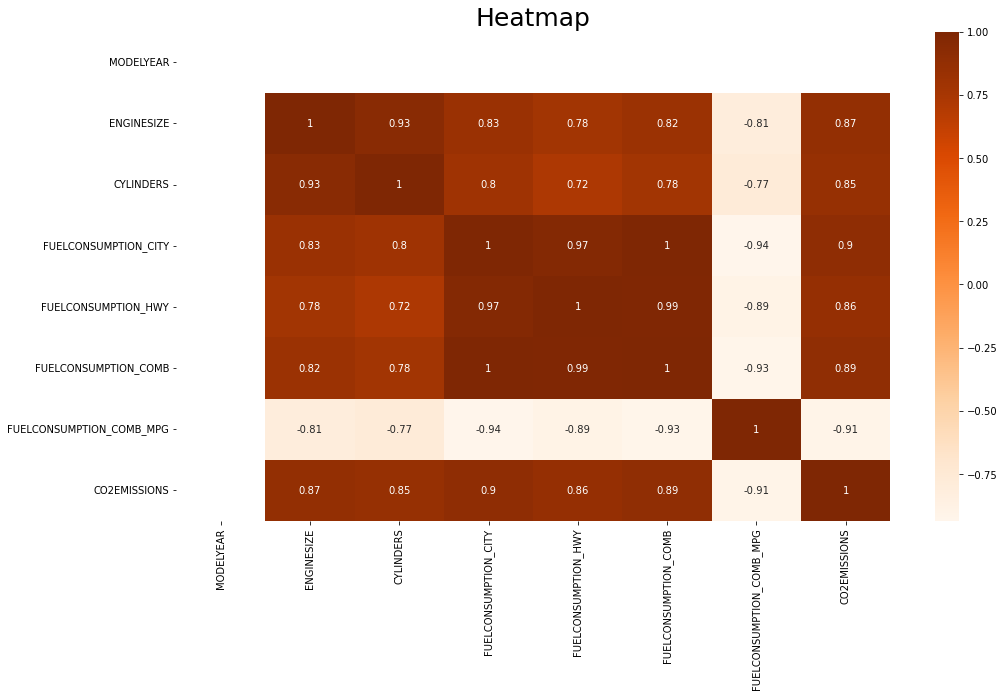

In [7]:
# heatmap to find the corelation between variables 
plt.figure(figsize=(16,9))
 
sns.heatmap(dfVisual.corr(), annot = True, cmap =('Oranges'))
 
plt.title("Heatmap", fontsize = 25) 

The correlation between ENGINESIZE and CO2EISSIONS is 0.87, which means strong correlation and that the size or power of the engine motor directly impacts the levels of CO2 emissions. The

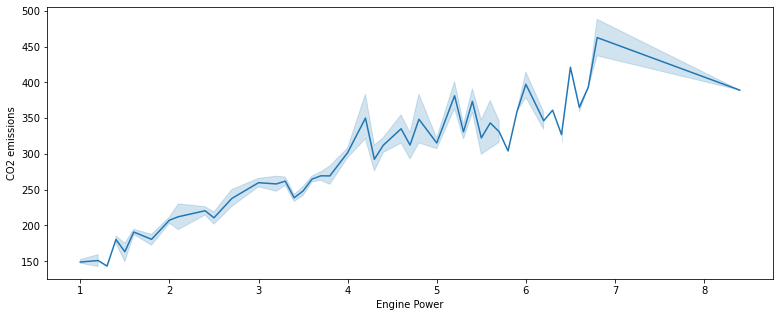

In [8]:
# ploting graph to show linear relationship between ENGINESIZE and CO2EMISSIONS
plt.figure(figsize=(13,5)) 
sns.lineplot(x=df['ENGINESIZE'], y=df['CO2EMISSIONS']) 
plt.xlabel('Engine Power') 
plt.ylabel('CO2 emissions') 
plt.show()

In [9]:
#splitting data to train the model 

#importing necessary libraries 
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split


In [10]:
#assign values to variables 
cc= df[['ENGINESIZE']]
co2 = df[['CO2EMISSIONS']]


In [11]:
# spliting into train and test dataset with train_test_split 
cc_train, cc_test, co2_train, co2_test = train_test_split(cc, co2, test_size=0.2, random_state=42)

In [12]:
print(type(cc_train))

<class 'pandas.core.frame.DataFrame'>


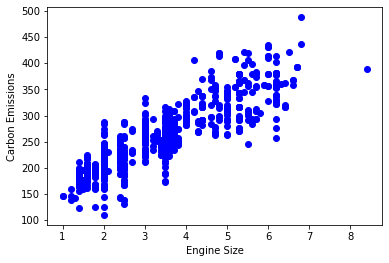

In [13]:
# ploting the correlation between features on train dataset
plt.scatter(cc_train, co2_train, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('Carbon Emissions')
plt.show()

In [14]:
# Creating the model with the train dataset 
# I use Linear Regression Model 
model = linear_model.LinearRegression()


In [15]:
# I use training dateset to train the model y=ax+b
model.fit(cc_train, co2_train)

LinearRegression()

In [16]:
# Finding coeficients A and B of the model
print(f'intercept: {model.intercept_} | slope: {model.coef_}')

intercept: [126.28970217] | slope: [[38.99297872]]


a=38.99297872
b=126.28970217

Linear Regression Model: y= 38.99297872x + 126.28970217

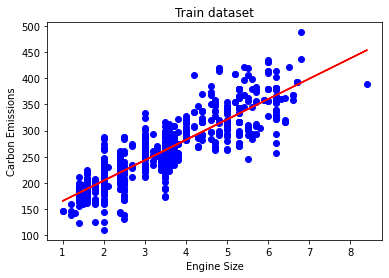

In [17]:
# Print Line of best fit for the TRAIN dataset
plt.scatter(cc_train, co2_train, color='blue')

# Linear Regression Model: slope(a) * cc_train(X) + intercept(b)
plt.plot(cc_train, model.coef_[0][0]*cc_train + model.intercept_[0], '-r') 
plt.ylabel('Carbon Emissions')
plt.xlabel('Engine Size')
plt.title("Train dataset")
plt.show()

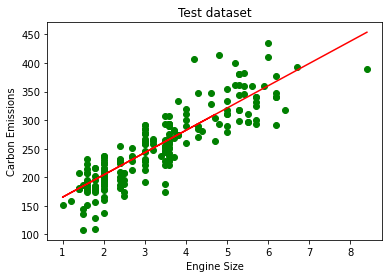

In [18]:
# Execute the model on the Test dataset

# Print Line of best fit on our TEST dataset
plt.scatter(cc_test, co2_test, color='green')
plt.plot(cc_test, model.coef_[0][0]*cc_test + model.intercept_[0], '-r')
plt.ylabel('Carbon Emissions')
plt.xlabel('Engine Size')
plt.title("Test dataset")
plt.show()

In [21]:
co2_predict = model.predict(cc_test)

In [23]:
from math import sqrt
# Showing metrics to check the acuracy of our model
print(f'Sum of squared error (SSE): {np.sum((co2_predict - co2_test)**2)}') 
print(f'Mean squared error (MSE): {mean_squared_error(co2_test, co2_predict)}') 
print (f'Sqrt of mean squared error (RMSE):  {sqrt(mean_squared_error(co2_test, co2_predict))}') 
print(f'R2-score: {r2_score(co2_predict, co2_test)}') 


Sum of squared error (SSE): CO2EMISSIONS    210990.768215
dtype: float64
Mean squared error (MSE): 985.9381692274999
Sqrt of mean squared error (RMSE):  31.399652374309813
R2-score: 0.6782015355440534
